<a href="https://colab.research.google.com/github/Abibsha/Concepts-and-Technologies-of-AI/blob/main/worksheet_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2.** **Exercise 1 - Implementation of Naive Bayes Algorithm Build a Sentiment Analysis Model for IMDB Movie Review Dataset**

**Part 1:**
1. Load the dataset and preprocess the reviews.

    a.	Convert all text to lowercase.

    b.	Remove non-alphabetic characters (punctuation).

    c.	Tokenize the reviews and remove common stopwords.

    d.	Apply stemming to reduce words to their root form.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score)

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/IMDB Dataset.csv")

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['review'] = df['review'].apply(preprocess)

2.	Split the dataset into training and testing sets (80% training, 20% testing).


In [22]:
X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3.	Use a Naive Bayes classifier to classify the reviews into positive and negative categories.

  a.	Implement a Bag-of-Words model using CountVectorizer.

  b.	Train the Naive Bayes classifier using the training set.


In [23]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [24]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

**Part 2:**
1. Evaluate the performance of the model using the following metrics:

    a.	Accuracy

    b.	Precision, Recall, and F1-score

    c.	Confusion Matrix

    d.	ROC-AUC Score

In [25]:
y_pred = nb_model.predict(X_test_vec)
accuracy_score(y_test, y_pred)

0.8555

In [26]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.87      0.86      4961
    positive       0.87      0.84      0.85      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [27]:
print("\nConfusion Matrix:")
confusion_matrix(y_test, y_pred)


Confusion Matrix:


array([[4324,  637],
       [ 808, 4231]])

In [28]:
y_prob = nb_model.predict_proba(X_test_vec)[:, 1]
roc_auc_score((y_test == 'positive').astype(int), y_prob)

np.float64(0.9224501018641973)

**3	Feature Selection**

**Exercise. 3.1	Feature Selection using Wrapper Methods.**  

**Part 1:** Data Loading and Preprocessing

    1. Load the Breast Cancer Prognostic Dataset.
    2.	Dataset is available in Drive.
    3.	Perform basic exploratory data analysis (EDA) to understand the dataset:
      •	Summarize key statistics for each feature.
      •	Check for missing values and handle them appropriately.
    4.	Split the dataset into training (80%) and testing (20%) sets.


In [40]:
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [42]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [44]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [45]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Part 2: Apply a Wrapper Method**

1.	Use Recursive Feature Elimination (RFE) with a Logistic Regression model to perform feature selection:

    •	Select the top 5 features that contribute the most to predicting the target variable.

    •	Visualize the ranking of features.
    
2.	Train the Logistic Regression model using only the selected features.


In [46]:
model = LogisticRegression(max_iter=5000)

rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['radius_mean', 'concavity_mean', 'radius_worst', 'compactness_worst',
       'concavity_worst'],
      dtype='object')


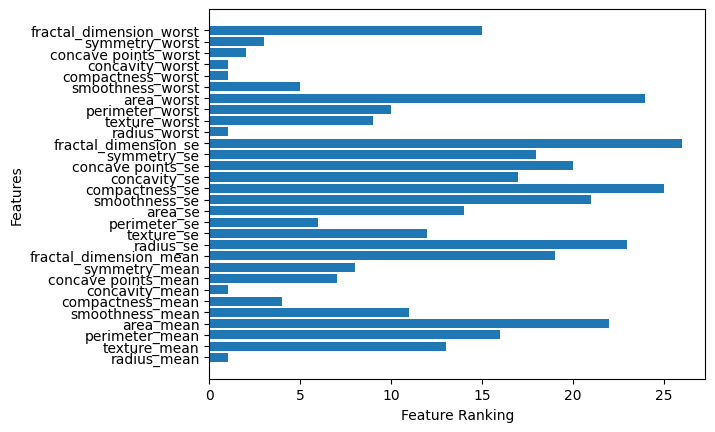

In [52]:
plt.barh(X_train.columns, rfe.ranking_)
plt.xlabel("Feature Ranking")
plt.ylabel("Features")
plt.show()

In [57]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)

y_pred_rfe = model.predict(X_test_rfe)
y_prob_rfe = model.predict_proba(X_test_rfe)[:,1]

**Part 3: Model Evaluation**

1.	Evaluate the model’s performance using the testing set:

    • Metrics to calculate: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
    
2.	Compare the performance of the model trained on all features versus the model trained on the selected features.


In [61]:
print("Accuracy:", accuracy_score(y_test, y_pred_rfe))
print("Precision:", precision_score(y_test, y_pred_rfe))
print("Recall:", recall_score(y_test, y_pred_rfe))
print("F1-Score:", f1_score(y_test, y_pred_rfe))
print("Classification Report:")
print(classification_report(y_test, y_pred_rfe))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rfe))

print("ROC-AUC:", roc_auc_score(y_test, y_prob_rfe))

Accuracy: 0.9385964912280702
Precision: 0.9473684210526315
Recall: 0.8780487804878049
F1-Score: 0.9113924050632911
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        73
           1       0.95      0.88      0.91        41

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix:
[[71  2]
 [ 5 36]]
ROC-AUC: 0.9675910457734714


In [62]:
model.fit(X_train, y_train)
y_pred_all = model.predict(X_test)
y_prob_all = model.predict_proba(X_test)[:,1]

print("Accuracy (All Features):", accuracy_score(y_test, y_pred_all))
print("ROC-AUC (All Features):", roc_auc_score(y_test, y_prob_all))
print("Accuracy (Selected Features):", accuracy_score(y_test, y_pred_rfe))
print("ROC-AUC (Selected Features):", roc_auc_score(y_test, y_prob_rfe))

Accuracy (All Features): 0.9385964912280702
ROC-AUC (All Features): 0.9796191112596058
Accuracy (Selected Features): 0.9385964912280702
ROC-AUC (Selected Features): 0.9675910457734714


**Part 4: Experiment**

1.	Experiment with different numbers of selected features (e.g., top 3, top 7).

2.	Discuss how feature selection affects model performance.


In [63]:
rfe3 = RFE(model, n_features_to_select=3)
rfe3.fit(X_train, y_train)
print("Top 3 Features:", X_train.columns[rfe3.support_])

rfe7 = RFE(model, n_features_to_select=7)
rfe7.fit(X_train, y_train)
print("Top 7 Features:", X_train.columns[rfe7.support_])

Top 3 Features: Index(['radius_worst', 'compactness_worst', 'concavity_worst'], dtype='object')
Top 7 Features: Index(['radius_mean', 'concavity_mean', 'radius_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')
